## System setup

---


##### Importing modules


In [1]:
from tensorflow.keras.layers import (
    Rescaling,
    Conv2D,
    AveragePooling2D,
    MaxPooling2D,
    BatchNormalization,
    Dropout,
    Flatten,
    Dense,
)
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import (
    TensorBoard,
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)

from toolkit.classes import DataSet, ImageProcessor, Augmenter, Model

2023-01-09 23:15:39.144495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 23:15:39.850182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 23:15:39.850217: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-09 23:15:42.110878: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Read dataset

---


##### Create image dataframe


In [2]:
images = DataSet()

In [3]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)


Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 175 images in ./preprocessed/Train/Non defective/
Found 175 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


## Data augmentation

---


In [8]:
N_augmented = 25

image_augmenter = Augmenter(N_augmented, images.data)
image_augmenter.remove_old_data(images.augmented_folder)
image_augmenter.augment_images()
del image_augmenter
images.update_dataset("augmented")
images.augmented


100%|██████████| 25/25 [00:08<00:00,  3.08it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


,type,defect,defect_str,path,filename,img,height,width,components,R_mean,G_mean,B_mean
0,train,0,Non defective,./augmented/Train/Non defective/,75_augmented.jpg,./augmented/Train/Non defective/75_augmented.jpg,0,0,0,0.0,0.0,0.0
1,train,0,Non defective,./augmented/Train/Non defective/,29_augmented.jpg,./augmented/Train/Non defective/29_augmented.jpg,0,0,0,0.0,0.0,0.0
2,train,0,Non defective,./augmented/Train/Non defective/,14_augmented.jpg,./augmented/Train/Non defective/14_augmented.jpg,0,0,0,0.0,0.0,0.0
3,train,0,Non defective,./augmented/Train/Non defective/,56_augmented.jpg,./augmented/Train/Non defective/56_augmented.jpg,0,0,0,0.0,0.0,0.0
4,train,0,Non defective,./augmented/Train/Non defective/,112_augmented.jpg,./augmented/Train/Non defective/112_augmented.jpg,0,0,0,0.0,0.0,0.0
5,train,0,Non defective,./augmented/Train/Non defective/,39_augmented.jpg,./augmented/Train/Non defective/39_augmented.jpg,0,0,0,0.0,0.0,0.0
6,train,0,Non defective,./augmented/Train/Non defective/,7_augmented.jpg,./augmented/Train/Non defective/7_augmented.jpg,0,0,0,0.0,0.0,0.0
7,train,0,Non defective,./augmented/Train/Non defective/,33_augmented.jpg,./augmented/Train/Non defective/33_augmented.jpg,0,0,0,0.0,0.0,0.0
8,train,0,Non defective,./augmented/Train/Non defective/,63_augmented.jpg,./augmented/Train/Non defective/63_augmented.jpg,0,0,0,0.0,0.0,0.0
9,train,0,Non defective,./augmented/Train/Non defective/,140_augmented.jpg,./augmented/Train/Non defective/140_augmented.jpg,0,0,0,0.0,0.0,0.0


## Image processing

---


In [4]:
img_height = 224
img_width = 224

preprocessing_steps = [
    "original",
    "resize",
    "save",
]

preprocessing_kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": img_height, "width": img_width},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "noise_filt": {"type": "median", "size": 11},
    "Laplacian": {"size": 5},
    "Canny": {"low": 100, "high": 200},
    "Hough": {"minLineLength": 10, "maxLineGap": 20},
    "feat_detect": {"type": "ORB"},
}


In [8]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
image_processor.process_images(images.augmented)
del image_processor


384it [02:17,  2.79it/s]
50it [00:16,  3.08it/s]


## Model build

---


##### Construct neural network


In [6]:
CNN = Model('VGG16_pretrained', img_height, img_width, pretrained="VGG16")

CNN.epochs = 1000
CNN.batch_size = 32

CNN.model = Sequential(
    [
        Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        CNN.pretrained_model,
        Flatten(),
        Dense(units=4096, activation="ReLU"),
        Dense(units=4096, activation="ReLU"),
        Dense(units=1, activation="sigmoid"),
    ]
)

CNN.optimizer = Adam(
    learning_rate=0.00001
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=25,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=1,
        verbose=1,
        mode="auto",
        min_lr=0.000005
    )
]

CNN.setup_neural_net(color_mode='rgb')
CNN.pretrained_model.summary()
CNN.model.summary()


2023-01-08 14:28:01.560208: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-08 14:28:01.560249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tomcom): /proc/driver/nvidia/version does not exist
2023-01-08 14:28:01.561612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58889256/58889256 [==============================] - 66s 1us/step


2023-01-08 14:29:09.020016: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-01-08 14:29:09.834039: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-01-08 14:29:11.789026: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-01-08 14:29:13.846636: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.
2023-01-08 14:29:13.890688: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 67108864 exceeds 10% of free system memory.


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 1)                 4097      
    

##### Train


In [8]:
CNN.train_net()


Epoch 1/1000
11/11 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.5829
Epoch 1: val_accuracy improved from -inf to 0.79032, saving model to ./models/VGG16_pretrained.h5
11/11 [==============================] - 121s 10s/step - loss: 0.6808 - accuracy: 0.5829 - val_loss: 0.5341 - val_accuracy: 0.7903 - lr: 1.0000e-05
Epoch 2/1000
11/11 [==============================] - ETA: 0s - loss: 0.4618 - accuracy: 0.8286
Epoch 2: val_accuracy improved from 0.79032 to 0.80645, saving model to ./models/VGG16_pretrained.h5
11/11 [==============================] - 117s 11s/step - loss: 0.4618 - accuracy: 0.8286 - val_loss: 0.4821 - val_accuracy: 0.8065 - lr: 1.0000e-05
Epoch 3/1000
11/11 [==============================] - ETA: 0s - loss: 0.3592 - accuracy: 0.9114 
Epoch 3: val_accuracy improved from 0.80645 to 0.82258, saving model to ./models/VGG16_pretrained.h5
11/11 [==============================] - 132s 13s/step - loss: 0.3592 - accuracy: 0.9114 - val_loss: 0.4608 - val_a

##### Predict


In [9]:
CNN.predict_test()


1/1 [==============================] - 4s 4s/step
Test values:          [0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0]
Predicted values:     [1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0]


##### Metrics


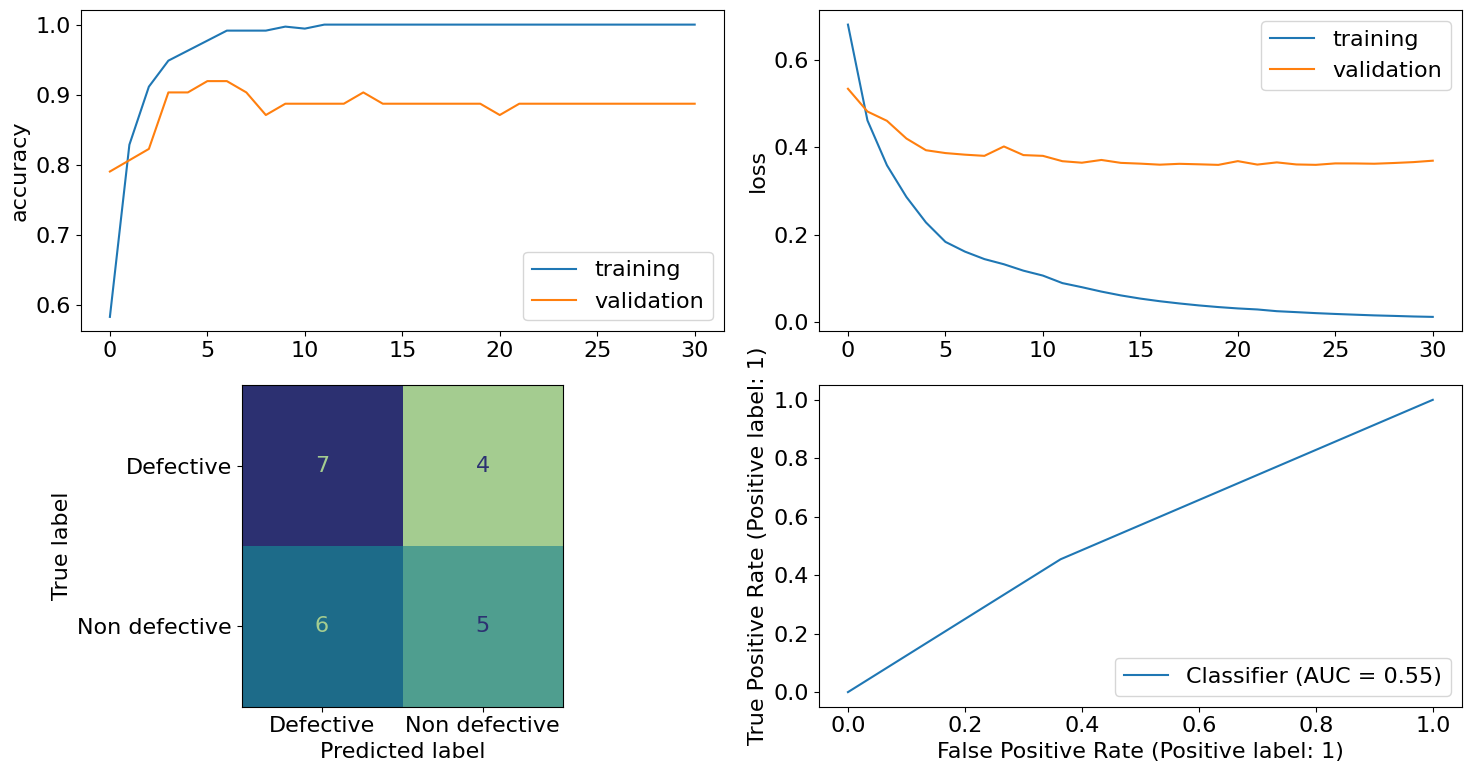

In [10]:
CNN.show_metrics(save_folder=images.plot_folder)


#### Fine tuning

In [6]:
CNN = Model('VGG16_pretrained_finetuned', img_height, img_width, pretrained="VGG16")

CNN.epochs = 1000
CNN.batch_size = 32

CNN.model = Sequential(
    [
        Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        CNN.pretrained_model,
        Flatten(),
        Dense(units=4096, activation="ReLU"),
        Dense(units=4096, activation="ReLU"),
        Dense(units=1, activation="sigmoid"),
    ]
)

CNN.optimizer = Adam(
    learning_rate=0.00001
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=25,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=1,
        verbose=1,
        mode="auto",
        min_lr=0.000001
    )
]

CNN.pretrained_model.trainable = True
CNN.model.load_weights('./models/VGG16_pretrained.h5')

CNN.setup_neural_net(color_mode='rgb')
CNN.pretrained_model.summary()
CNN.model.summary()

2023-01-09 23:18:50.425523: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
         

In [7]:
CNN.train_net()

Epoch 1/1000
11/11 [==============================] - ETA: 0s - loss: 0.2224 - accuracy: 0.9114 
Epoch 1: val_accuracy improved from -inf to 0.90323, saving model to ./models/VGG16_pretrained_finetuned.h5
11/11 [==============================] - 432s 40s/step - loss: 0.2224 - accuracy: 0.9114 - val_loss: 0.3724 - val_accuracy: 0.9032 - lr: 1.0000e-05
Epoch 2/1000
11/11 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9914 
Epoch 2: val_accuracy did not improve from 0.90323

Epoch 2: ReduceLROnPlateau reducing learning rate to 1e-06.
11/11 [==============================] - 490s 47s/step - loss: 0.1019 - accuracy: 0.9914 - val_loss: 0.4464 - val_accuracy: 0.7903 - lr: 1.0000e-05
Epoch 3/1000
11/11 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 1.0000 
Epoch 3: val_accuracy did not improve from 0.90323
11/11 [==============================] - 483s 45s/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 0.3703 - val_accuracy: 0.8871 - lr: 1.000

In [8]:
CNN.predict_test()

1/1 [==============================] - 6s 6s/step
Test values:          [0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0]
Predicted values:     [0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0]


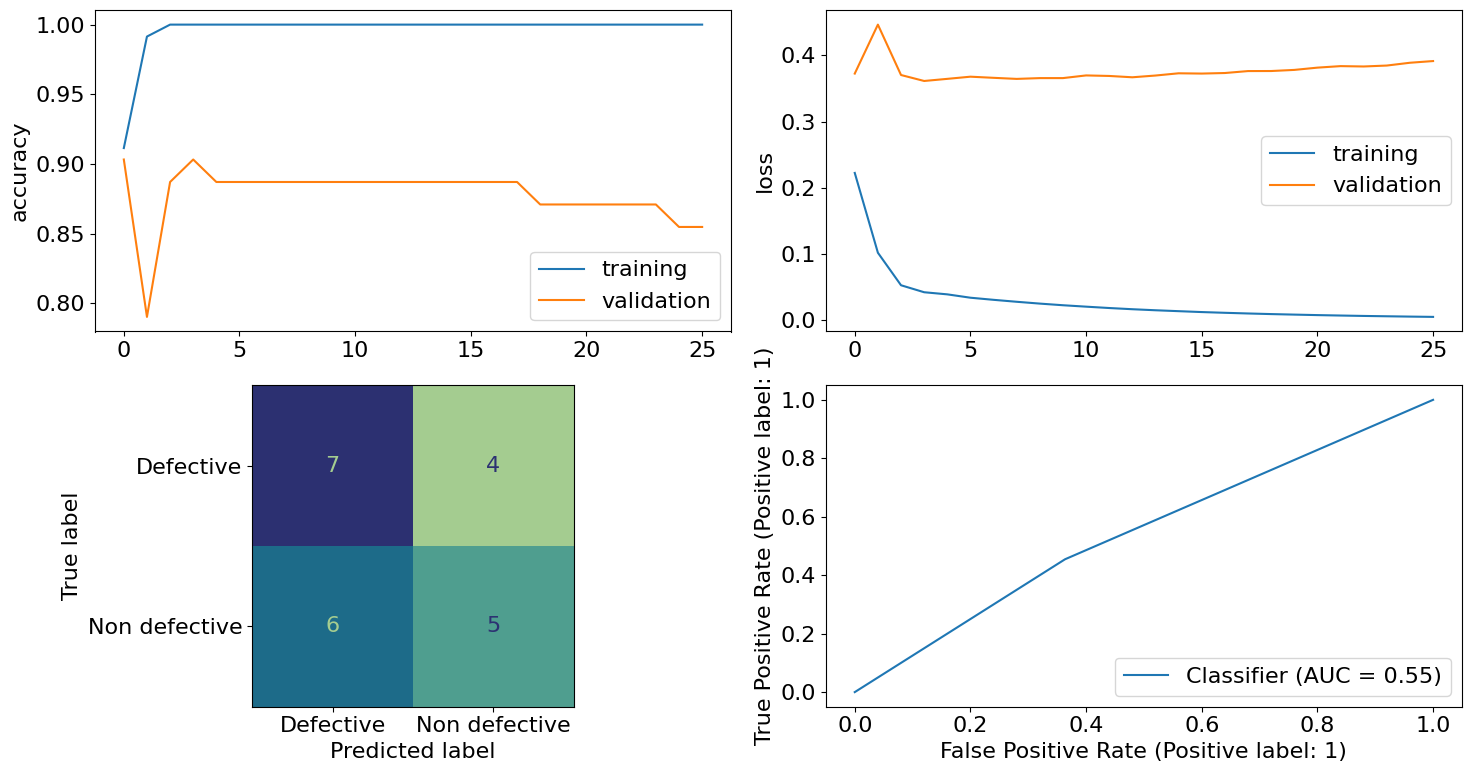

In [9]:
CNN.show_metrics(save_folder=images.plot_folder)